# why is there a halo in gcm-filters?

In [16]:
import numpy as np
import gcm_filters
import xarray as xr

ny, nx = (128, 256)

mask_data = np.ones((ny, nx))

mask_data[(ny // 4):(3 * ny // 4), (nx // 4):(3 * nx // 4)] = 0

wet_mask = xr.DataArray(mask_data, dims=['y', 'x'])

In [17]:
filter = gcm_filters.Filter(
    filter_scale=400,
    dx_min=1,
    filter_shape=gcm_filters.FilterShape.TAPER,
    grid_type=gcm_filters.GridType.REGULAR_WITH_LAND,
    grid_vars={'wet_mask': wet_mask}
)

In [18]:
nt = 10

data = np.random.rand(nt, ny, nx)+4000

da = xr.DataArray(data, dims=['time', 'y', 'x'])

da_masked = da.where(wet_mask)

In [19]:
da_filtered = filter.apply(da_masked, dims=['y', 'x'])

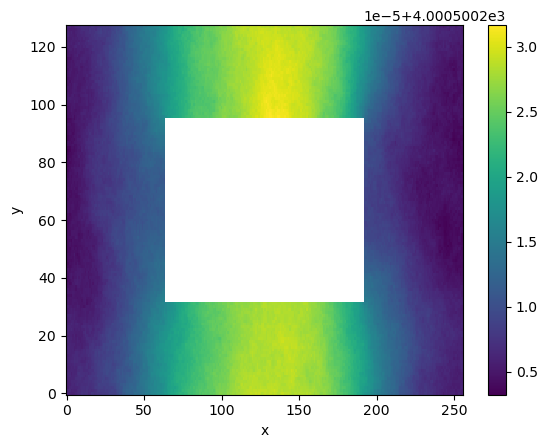

In [20]:
(da_filtered).isel(time=0).plot()

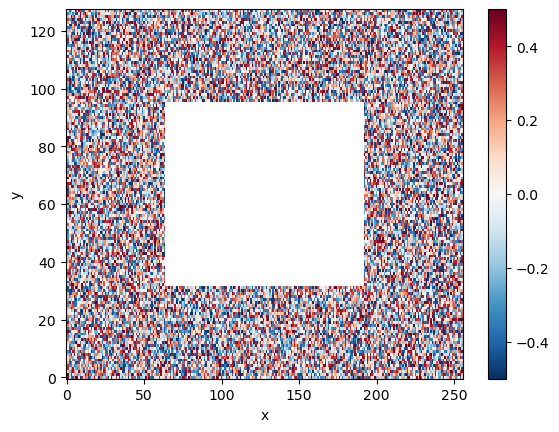

In [21]:
(da_masked-da_filtered).isel(time=0).plot()

## This seems fine. What about the actual data?

In [25]:
from cm26_utils import load_and_combine_cm26
import json
import gcsfs
# set up gcs filesystem
# 👇 replace with your key 
with open( '/home/jovyan/KEYS/pangeo-forge-ocean-transport-4967-347e2048c5a1.json') as token_file:
    token = json.load(token_file)
fs = gcsfs.GCSFileSystem(token=token)
%config InlineBackend.figure_format='retina'

In [27]:
ds = load_and_combine_cm26(fs)

Load Data
Align in time
Interpolating ocean velocities
Regrid Atmospheric Data
Modify units
Mask nans
Calculate relative wind
